Student Details

### Name: Abhijit Sinha

### ID: 18195067

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

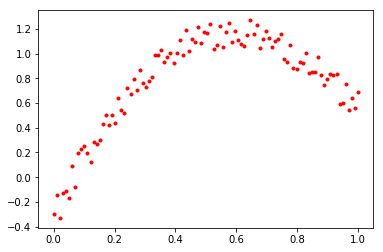

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [3]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [4]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [6]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [7]:
ein=[]
eout=[]
weights=[]

# Selecting 1000 values of lambda
lambdas = np.arange(0, 1, 0.001)
print(lambdas.shape)

X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.1, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

(1000,)


## Task 4 (CE6002)

### Task 4.1 
Using the above code, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. 
- Pick at most 1000 values! Once you have found the optimal l, 
- compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

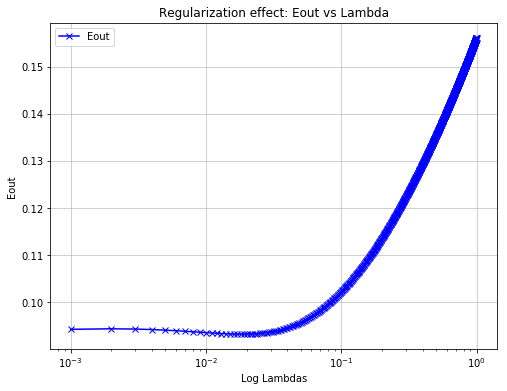

In [8]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(8,6))

# Plot for lambda > 0 : the 999 lambda and Eout values are used 
plt.plot(lambdas[1:], eout[1:], 'bx-', label='Eout')

plt.title('Regularization effect: Eout vs Lambda')
plt.xlabel('Log Lambdas')
plt.ylabel('Eout')

plt.xscale('log')
plt.grid(alpha=0.75)
plt.legend()
plt.show()

In [9]:
# Find the index with Max and Min Eout
max_err_idx = np.argmax(eout)
min_err_idx = np.argmin(eout)

# Best lambda is at index with minimum out-sample error, Eout
best_lambda = lambdas[min_err_idx]

In [10]:
# Print the best lambda and Eout with and without regularization

print('Best value of lambda       :',  best_lambda)
print('Best lambda found at index :',  min_err_idx)    

print('**'*40)
print('Eout with regularization   :',  eout[min_err_idx])
print('Eout with no regularization:',  eout[0])

print('**'*40)
print('Difference is error Eout <with/out regularization> :', eout[0] - eout[min_err_idx])


Best value of lambda       : 0.018000000000000002
Best lambda found at index : 18
********************************************************************************
Eout with regularization   : 0.0932786350485276
Eout with no regularization: 3.792037561002488
********************************************************************************
Difference is error Eout <with/out regularization> : 3.6987589259539604


### Observations:
We can see the the effect of regularization parameter lambda is very significant in getting a low out-sample error Eout. The difference in the error when using regularization shows a huge improvement in Eout.

### Task 4.2 Provide the following plots:

1. A plot showing the estimate of Eout vs l on the domain [0,1]
2. A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

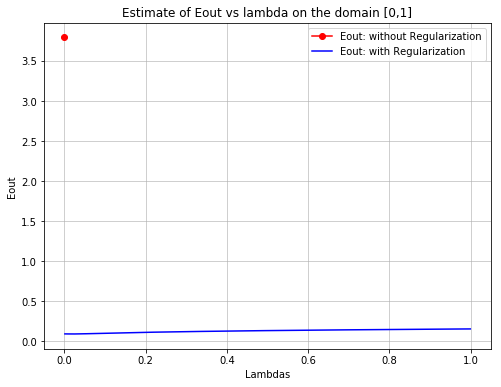

In [11]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(8,6))

# Plot for all 1000 values of lambdas[0,1]
plt.plot(lambdas[0], eout[0], 'ro-', label='Eout: without Regularization')
plt.plot(lambdas[1:], eout[1:], 'b-', label='Eout: with Regularization')

plt.title('Estimate of Eout vs lambda on the domain [0,1]')
plt.xlabel('Lambdas')
plt.ylabel('Eout')

plt.legend()
plt.grid(alpha=0.75)
plt.show()

In [12]:
def calc_polynom(weights, X): 
    # Function to calculate the prediction (inspired by Michel's work)
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

In [13]:
def run_experiment(X, y, l):
    # Function to run the test for different lambda values
    ein=[]
    eout=[]
    weights=[]
    pred=[]
    
    X_trans = transPoly(X,50)
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.1, random_state =5)

    weights = weights_reg(X_train, y_train, l)
    ein     = calc_error(weights, X_train, y_train)
    eout    = calc_error(weights, X_test, y_test)   
    pred    = calc_polynom(weights, X)

    return pred

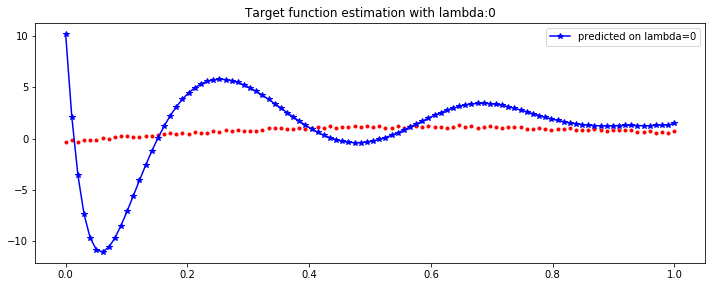

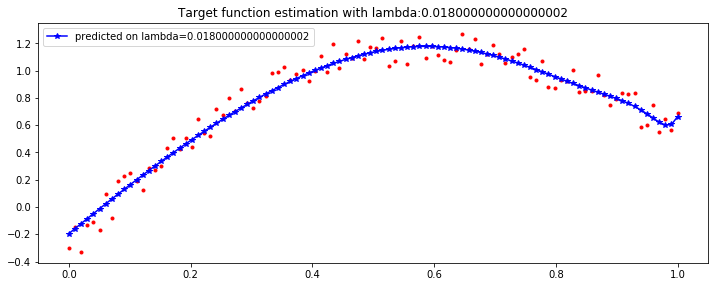

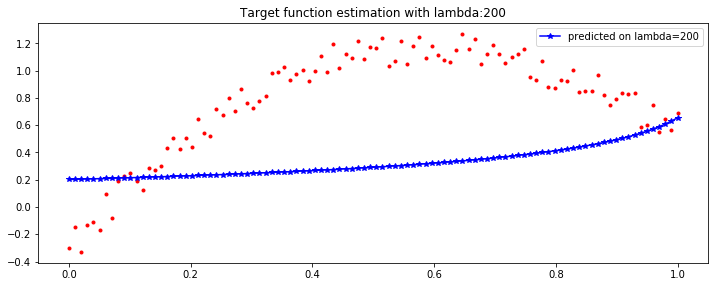

In [14]:
# Select the lambda values for the experiment
l = [0, best_lambda, 200]

# Plot 3 plots for model with the overfitting, optimal l, and an underfitted model.
# loop on the selected lambda values
for idx, _ in enumerate(l):
    predicted = run_experiment(X, y, l[idx])

    # Subplot the target function
    plt.figure(figsize=(12, 15))
    temp = 311+idx
    plt.subplot(temp)

    # Plot the signal
    plt.plot(X, y, 'r.')

    # PLot the predictions based on lambda
    plt.plot(X, predicted , 'b*-', label='predicted on lambda='+str(l[idx]))

    plt.title('Target function estimation with lambda:'+str(l[idx]) )
    plt.legend()
    plt.show()

## Task 5 (CE6002)
Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. Note that the data set provided is ordered by increasing X.

In [15]:
def run_crossvalidation(X, y, l):
    ein=[]
    eout=[]
    weights=[]
    pred=[]

    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    
    X_trans = transPoly(X,50)
    
    for train_index, test_index in kf.split(X_trans):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
        weights.append(w)
    
    
    # Do prediction on the best weights from the K-Fold
    min_eout_idx = np.argmin(eout)
    weights = weights[min_eout_idx]     
    pred    = calc_polynom(weights, X)

    return pred


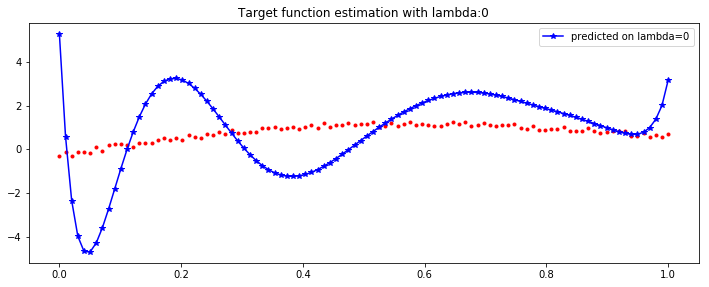

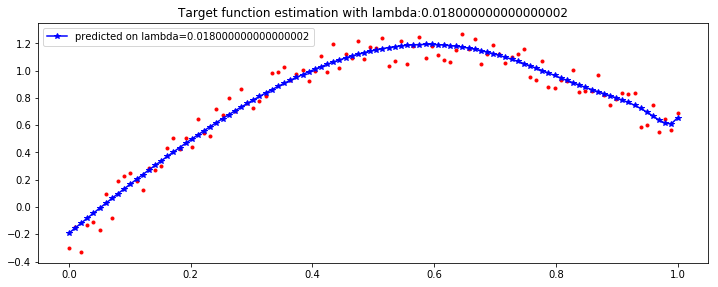

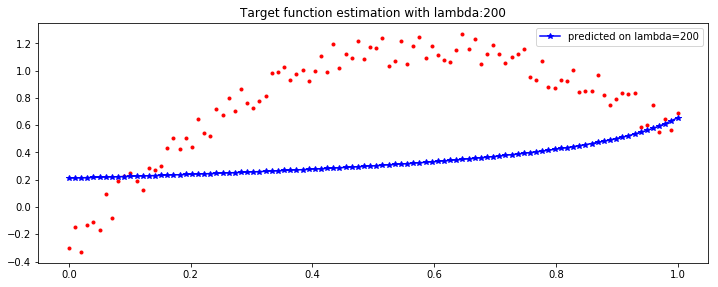

In [16]:
# Select the lambda values for the experiment
l = [0, best_lambda, 200] # do we need to find lambda again is CV?

# Plot 3 plots for model with the overfitting, optimal l, and an underfitted model.
# loop on the selected lambda values
for idx, _ in enumerate(l):
    predicted = run_crossvalidation(X, y, l[idx])

    # Subplot the target function
    plt.figure(figsize=(12, 15)) 
    temp = 311+idx
    plt.subplot(temp)

    # Plot the signal
    plt.plot(X, y, 'r.')

    # PLot the predictions based on lambda
    plt.plot(X, predicted , 'b*-', label='predicted on lambda='+str(l[idx]))

    plt.title('Target function estimation with lambda:'+str(l[idx]))
    plt.legend()
    plt.show()

## Task 6 (CE6002)
Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected?
Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?


References: 
1. https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

### Ridge CV

score : 0.9619820877748717
Best estimated regularization parameter, l: 0.013000000000000001


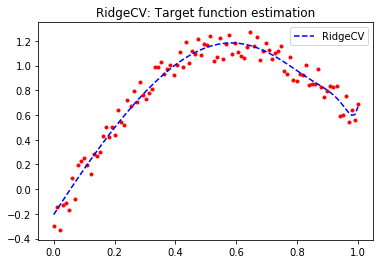

In [17]:
# Set the regularization parameters (trying for all 1000 values, takes some time to run)
alpha_list = np.arange(0, 1, 0.001)
folds = 10

ridgeCV_clf = RidgeCV(alphas=alpha_list, cv=folds)
ridgeCV_clf.fit(X_trans, y)

ridgeCV_score  = ridgeCV_clf.score(X_trans, y) 
predictions    = ridgeCV_clf.predict(X_trans)

print("score :", ridgeCV_score)
print("Best estimated regularization parameter, l:", ridgeCV_clf.alpha_)

plt.title('RidgeCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions,'b--', label='RidgeCV')

plt.legend(loc='best')
plt.show()

### Lasso CV

score : 0.9471357350252269
Best estimated regularization parameter, l: 0.001


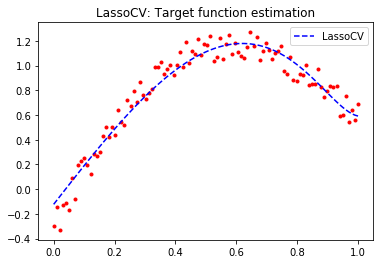

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Set the regularization parameters (trying for all 1000 values)
alpha_list = np.arange(0, 1, 0.001)
folds = 10

lassoCV_clf = LassoCV(alphas=alpha_list, cv=folds, random_state=5, n_jobs=-2)
lassoCV_clf.fit(X_trans, y)


lassoCV_score  = lassoCV_clf.score(X_trans, y) 
predictions    = lassoCV_clf.predict(X_trans)

print("score :", lassoCV_score)
print("Best estimated regularization parameter, l:", lassoCV_clf.alpha_)

plt.title('LassoCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions, 'b--', label='LassoCV')

plt.legend(loc='best')
plt.show()

### TODO: Observe the resulting Eout and lambda. Compare these to previous results